In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Verificando se as bibliotecas foram carregadas
print("Bibliotecas carregadas com sucesso!")



Bibliotecas carregadas com sucesso!


In [5]:
import pandas as pd

# Criando o DataFrame com dados hipotéticos
dados = {
    'Região': ['Norte', 'Norte', 'Sul', 'Sul', 'Norte'],
    'Mês': ['Jan', 'Fev', 'Jan', 'Fev', 'Mar'],
    'Vendas': [1500, None, 2200, 1800, 2000],
    'Despesas': [300, 250, None, 400, 350]
}

df = pd.DataFrame(dados)

# Salvando o DataFrame como um arquivo Excel
df.to_excel('vendas.xlsx', index=False)

# Verificando o conteúdo do DataFrame
print(df)


  Região  Mês  Vendas  Despesas
0  Norte  Jan  1500.0     300.0
1  Norte  Fev     NaN     250.0
2    Sul  Jan  2200.0       NaN
3    Sul  Fev  1800.0     400.0
4  Norte  Mar  2000.0     350.0


In [6]:
# Carregando o arquivo Excel
df = pd.read_excel('vendas.xlsx')

# Exibindo as primeiras linhas para verificar os dados
print(df.head())

# Substituindo os valores ausentes na coluna "Vendas" pela mediana
df['Vendas'] = df['Vendas'].fillna(df['Vendas'].median())

# Substituindo os valores ausentes na coluna "Despesas" pela média
df['Despesas'] = df['Despesas'].fillna(df['Despesas'].mean())

# Exibindo as alterações
print(df.head())


  Região  Mês  Vendas  Despesas
0  Norte  Jan  1500.0     300.0
1  Norte  Fev     NaN     250.0
2    Sul  Jan  2200.0       NaN
3    Sul  Fev  1800.0     400.0
4  Norte  Mar  2000.0     350.0
  Região  Mês  Vendas  Despesas
0  Norte  Jan  1500.0     300.0
1  Norte  Fev  1900.0     250.0
2    Sul  Jan  2200.0     325.0
3    Sul  Fev  1800.0     400.0
4  Norte  Mar  2000.0     350.0


In [7]:
# Agrupando os dados por "Região" e "Mês" e realizando as agregações
grupo_df = df.groupby(['Região', 'Mês']).agg(
    Vendas_totais=('Vendas', 'sum'),
    Media_Despesas=('Despesas', 'mean')
).reset_index()

# Exibindo o resultado
print(grupo_df)


  Região  Mês  Vendas_totais  Media_Despesas
0  Norte  Fev         1900.0           250.0
1  Norte  Jan         1500.0           300.0
2  Norte  Mar         2000.0           350.0
3    Sul  Fev         1800.0           400.0
4    Sul  Jan         2200.0           325.0


In [8]:
# Combinando as colunas "Vendas" e "Despesas"
df_combined = pd.concat([df['Vendas'], df['Despesas']], axis=1)

# Exibindo a combinação
print(df_combined)


   Vendas  Despesas
0  1500.0     300.0
1  1900.0     250.0
2  2200.0     325.0
3  1800.0     400.0
4  2000.0     350.0


In [9]:
# Gerando sumário estatístico
summary = df.describe()
print(summary)


            Vendas    Despesas
count     5.000000    5.000000
mean   1880.000000  325.000000
std     258.843582   55.901699
min    1500.000000  250.000000
25%    1800.000000  300.000000
50%    1900.000000  325.000000
75%    2000.000000  350.000000
max    2200.000000  400.000000


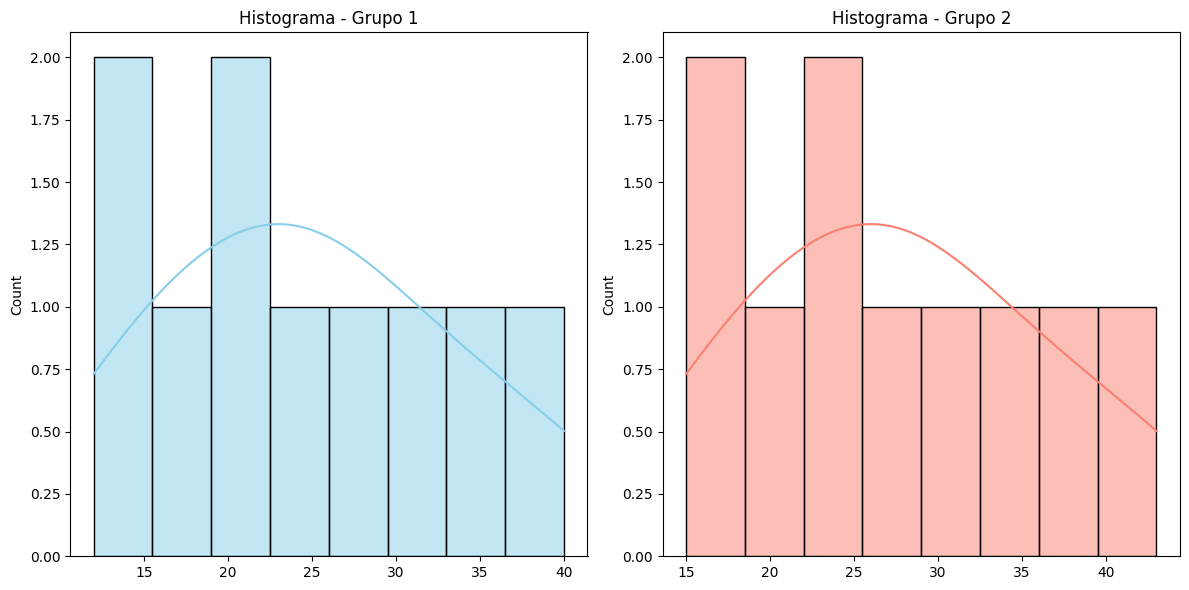

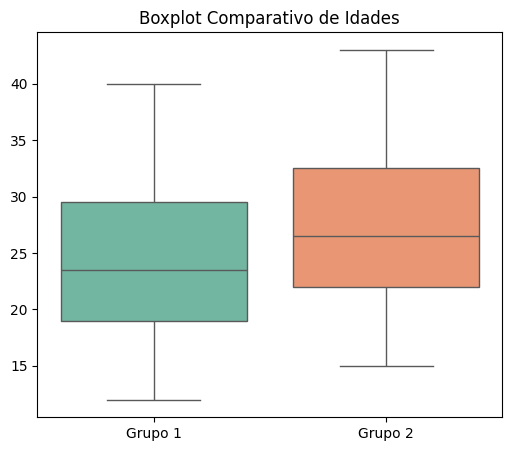

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados dos grupos
grupo1 = [12, 15, 18, 22, 22, 25, 28, 30, 35, 40]
grupo2 = [15, 18, 21, 25, 25, 28, 31, 33, 38, 43]

# Histograma para os dois grupos
plt.figure(figsize=(12, 6))

# Subplot 1: Histograma do Grupo 1
plt.subplot(1, 2, 1)
sns.histplot(grupo1, kde=True, bins=8, color='skyblue')
plt.title("Histograma - Grupo 1")

# Subplot 2: Histograma do Grupo 2
plt.subplot(1, 2, 2)
sns.histplot(grupo2, kde=True, bins=8, color='salmon')
plt.title("Histograma - Grupo 2")

plt.tight_layout()
plt.show()

# Boxplot comparativo
plt.figure(figsize=(6, 5))
sns.boxplot(data=[grupo1, grupo2], palette='Set2')
plt.title("Boxplot Comparativo de Idades")
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.show()
